# IRIS SPECIES PREDICTION MODEL

The iris dataset contains three classes of flowers, Versicolor, Setosa, Virginica, and each class contains 4 features, ‘Sepal length’, ‘Sepal width’, ‘Petal length’, ‘Petal width’. The aim of the iris flower classification is to predict flowers based on their specific features.

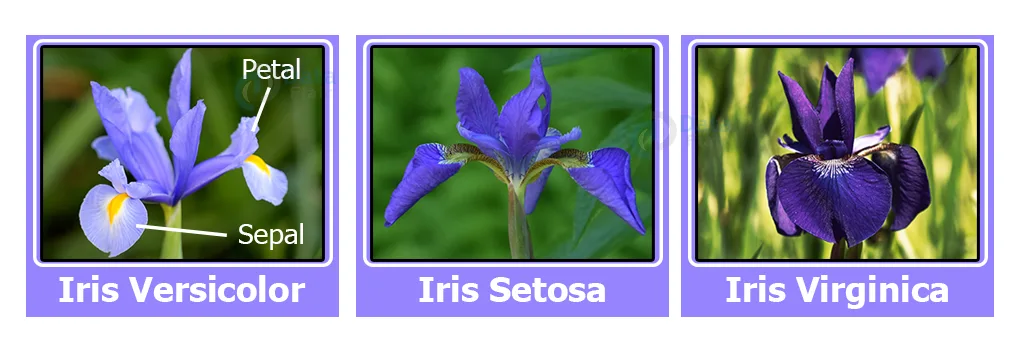

# STEP-1

Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn import tree, model_selection, metrics

Load the IRIS dataset using library function

In [3]:
iris=datasets.load_iris()

In [4]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

# Data preprocessing

In [5]:
df=pd.read_csv("irisflower.csv")

In [6]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
df.shape

(150, 5)

In [10]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Exploratory data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Checking any missing values

In [13]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Encoding categorical variables

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [15]:
df['species']=labelencoder.fit_transform(df['species'])

In [16]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Data Visualization

<AxesSubplot:>

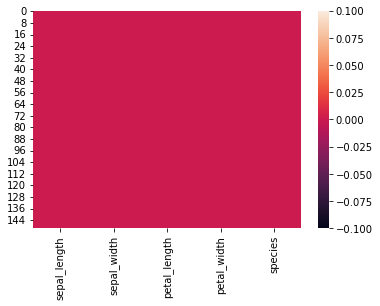

In [17]:
sns.heatmap(data=df.isnull())

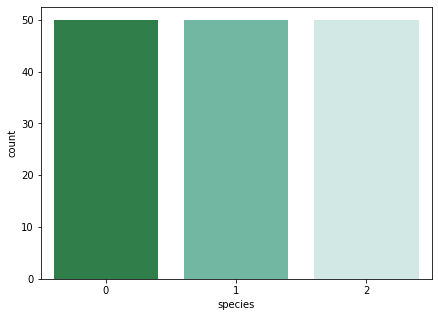

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(x='species', data=df,
             palette="BuGn_r")
plt.show()

<AxesSubplot:xlabel='sepal_width', ylabel='Count'>

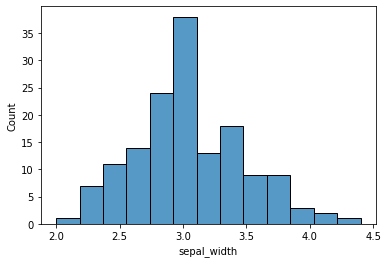

In [19]:
sns.histplot(data=df['sepal_width'])

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

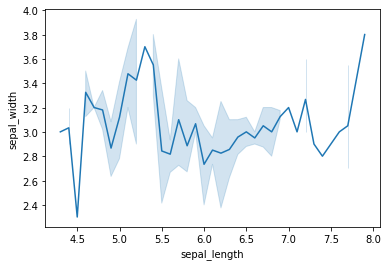

In [20]:
sns.lineplot(x=df['sepal_length'],y=df['sepal_width'],data=df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

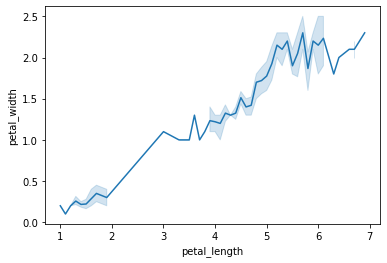

In [21]:
sns.lineplot(x=df['petal_length'],y=df['petal_width'],data=df)

<AxesSubplot:xlabel='sepal_width', ylabel='Density'>

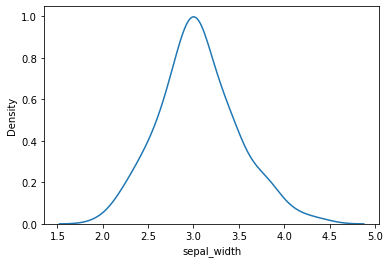

In [23]:
sns.kdeplot(df['sepal_width'])

<AxesSubplot:xlabel='petal_length', ylabel='Count'>

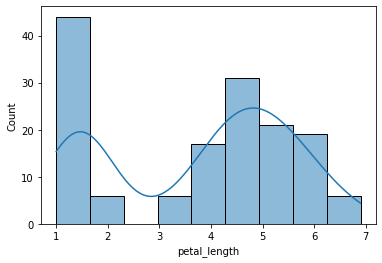

In [24]:
sns.histplot(df['petal_length'],kde='true')

<AxesSubplot:>

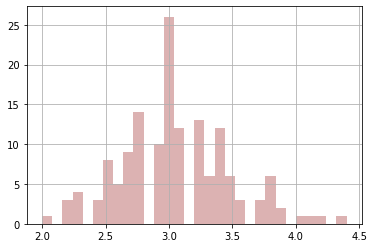

In [25]:
df['sepal_width'].hist(bins=30,color='darkred',alpha=0.3)

Split dataset into features(X) and target labels (Y)

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [27]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [28]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

Normalization of the dataset

In [29]:
x =StandardScaler().fit(x).transform(x)

# STEP-2

Split data into training and testing sets

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
x_train.shape

(120, 4)

In [32]:
x_test.shape

(30, 4)

In [33]:
y_train.shape

(120,)

In [34]:
y_test.shape

(30,)

# Model implementation

# Decision tree

In [35]:
tree=DecisionTreeClassifier(random_state=40,max_depth=6)
tree.fit(x_train,y_train)
y_train_predict_tree=tree.predict(x_train)
y_test_predict_tree=tree.predict(x_test)

In [36]:
y_test_predict_tree

array([0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 1, 2, 1, 2, 1, 0])

In [37]:
print("------------------Training Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_train,y_train_predict_tree))
print("Mean squared error:",metrics.mean_squared_error(y_train,y_train_predict_tree))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_tree)))
print("R2 Score:",metrics.r2_score(y_train,y_train_predict_tree))
print("Recall:",metrics.recall_score(y_train,y_train_predict_tree,average='micro'))
print("Accuracy:",metrics.accuracy_score(y_train,y_train_predict_tree)*100)
print("Precision:",precision_score(y_train,y_train_predict_tree,average='micro'))
print("confusion Matrix:\n",metrics.confusion_matrix(y_train,y_train_predict_tree))
print("classification Matrix:",metrics.classification_report(y_train,y_train_predict_tree))

print("------------------Testing Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_test_predict_tree))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_test_predict_tree))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_tree)))
print("R2 Score:",metrics.r2_score(y_test,y_test_predict_tree))
print("Recall:",metrics.recall_score(y_test,y_test_predict_tree,average='micro'))
print("Accuracy:",accuracy_score(y_test,y_test_predict_tree)*100)
print("Precision:",precision_score(y_test,y_test_predict_tree,average='micro'))
print("confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_tree))
print("classification Matrix:",classification_report(y_test,y_test_predict_tree))

------------------Training Data----------------
Mean absolute error: 0.0
Mean squared error: 0.0
Root Mean squared error: 0.0
R2 Score: 1.0
Recall: 1.0
Accuracy: 100.0
Precision: 1.0
confusion Matrix:
 [[36  0  0]
 [ 0 43  0]
 [ 0  0 41]]
classification Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        41

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

------------------Testing Data----------------
Mean absolute error: 0.0
Mean squared error: 0.0
Root Mean squared error: 0.0
R2 Score: 1.0
Recall: 1.0
Accuracy: 100.0
Precision: 1.0
confusion Matrix:
 [[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
classification Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.

# SVM

In [38]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)



SVC(kernel='linear')

In [39]:
y_train_predict_SVC=model.predict(x_train)

In [40]:
y_test_predict_SVC=model.predict(x_test)

In [41]:
y_test_predict_SVC

array([0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 1, 2, 1, 2, 1, 0])

In [42]:
print("------------------Training Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_train,y_train_predict_SVC))
print("Mean squared error:",metrics.mean_squared_error(y_train,y_train_predict_SVC))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_SVC)))
print("R2 Score:",metrics.r2_score(y_train,y_train_predict_SVC))
print("Recall:",metrics.recall_score(y_train,y_train_predict_SVC,average='micro'))
print("Accuracy:",accuracy_score(y_train,y_train_predict_SVC))
print("Precision:",precision_score(y_train,y_train_predict_SVC,average='micro'))
print("confusion Matrix:\n",metrics.confusion_matrix(y_train,y_train_predict_SVC))
print("classification Matrix:",metrics.classification_report(y_train,y_train_predict_SVC))

print("------------------Testing Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_test_predict_SVC))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_test_predict_SVC))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_SVC)))
print("R2 Score:",metrics.r2_score(y_test,y_test_predict_SVC))
print("Recall:",metrics.recall_score(y_test,y_test_predict_SVC,average='micro'))
print("S:",accuracy_score(y_test,y_test_predict_SVC))
print("Precision:",precision_score(y_test,y_test_predict_SVC,average='micro'))
print("confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_SVC))
print("classification Matrix:",classification_report(y_test,y_test_predict_SVC))

------------------Training Data----------------
Mean absolute error: 0.03333333333333333
Mean squared error: 0.03333333333333333
Root Mean squared error: 0.18257418583505536
R2 Score: 0.9479110146500271
Recall: 0.9666666666666667
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
confusion Matrix:
 [[36  0  0]
 [ 0 39  4]
 [ 0  0 41]]
classification Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.91      0.95        43
           2       0.91      1.00      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

------------------Testing Data----------------
Mean absolute error: 0.03333333333333333
Mean squared error: 0.03333333333333333
Root Mean squared error: 0.18257418583505536
R2 Score: 0.9548872180451128
Recall: 0.9666666666666667
Accuracy: 0.9666666666

# RANDOM FOREST REGRESSION

In [43]:
rfr=RandomForestRegressor(n_estimators=100,max_depth=7,max_features='auto',min_samples_split=7,min_samples_leaf=3)
rfr.fit(x_train,y_train)
y_train_predict_rfr=rfr.predict(x_train)
y_test_predict_rfr=rfr.predict(x_test)

In [44]:
from sklearn.model_selection import RandomizedSearchCV
params={'max_depth':[3,4,5,6,7],
       'max_features':['auto','sqrt','log2'],
       'min_samples_split':[2,3,4,5,6,7,8,9,10],
       'min_samples_leaf':[2,3,4,5,6,7,8,9,10],
       'n_estimators':[100,200,300,400,500]
       }
forest=RandomizedSearchCV(rfr,params,n_jobs=-1,cv=5,verbose=2)
forest.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=7,
                                                   min_samples_leaf=3,
                                                   min_samples_split=7),
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [45]:
y_train_predict_rfr_1=forest.predict(x_train).round()
y_test_predict_rfr_1=forest.predict(x_test).round()

In [46]:
y_test_predict_rfr_1

array([0., 0., 2., 0., 0., 0., 2., 0., 2., 0., 0., 2., 1., 1., 1., 0., 0.,
       2., 2., 1., 0., 2., 0., 0., 1., 2., 1., 2., 1., 0.])

In [47]:
print("------------------Training Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_train,y_train_predict_rfr_1))
print("Mean squared error:",metrics.mean_squared_error(y_train,y_train_predict_rfr_1))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr_1)))
print("R2 Score:",metrics.r2_score(y_train,y_train_predict_rfr_1))
print("Recall:",metrics.recall_score(y_train,y_train_predict_rfr_1,average='micro'))
print("Accuracy:",accuracy_score(y_train,y_train_predict_rfr_1))
print("Precision:",precision_score(y_train,y_train_predict_rfr_1,average='micro'))
print("confusion Matrix:\n",metrics.confusion_matrix(y_train,y_train_predict_rfr_1))
print("classification Matrix:",metrics.classification_report(y_train,y_train_predict_rfr_1))


print("------------------Testing Data----------------")
print("Mean absolute error:",metrics.mean_absolute_error(y_test,y_test_predict_rfr_1))
print("Mean squared error:",metrics.mean_squared_error(y_test,y_test_predict_rfr_1))
print("Root Mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr_1)))
print("R2 Score:",metrics.r2_score(y_test,y_test_predict_rfr_1))
print("Recall:",metrics.recall_score(y_test,y_test_predict_rfr_1,average='micro'))
print("Accuracy:",accuracy_score(y_test,y_test_predict_rfr_1))
print("Precision:",precision_score(y_test,y_test_predict_rfr_1,average='micro'))
print("confusion Matrix:\n",confusion_matrix(y_test,y_test_predict_rfr_1))
print("classification Matrix:",classification_report(y_test,y_test_predict_rfr_1))



------------------Training Data----------------
Mean absolute error: 0.03333333333333333
Mean squared error: 0.03333333333333333
Root Mean squared error: 0.18257418583505536
R2 Score: 0.9479110146500271
Recall: 0.9666666666666667
Accuracy: 0.9666666666666667
Precision: 0.9666666666666667
confusion Matrix:
 [[36  0  0]
 [ 0 40  3]
 [ 0  1 40]]
classification Matrix:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.98      0.93      0.95        43
           2       0.93      0.98      0.95        41

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

------------------Testing Data----------------
Mean absolute error: 0.0
Mean squared error: 0.0
Root Mean squared error: 0.0
R2 Score: 1.0
Recall: 1.0
Accuracy: 1.0
Precision: 1.0
confusion Matrix:
 [[14  0  0]
 [ 0  7  0]
 [ 0  0  9]]
classification 

# Accuracy 

In [49]:
print("Accuracy on Training set:")
output_train=pd.DataFrame({'Model':['Decision Tree','SVM','Random FOrest'],'Acuuracy':[metrics.r2_score(y_train,y_train_predict_tree),metrics.r2_score(y_train,y_train_predict_SVC),metrics.r2_score(y_train,y_train_predict_rfr_1)]})
output_train

Accuracy on Training set:


,Model,Acuuracy
0,Decision Tree,1.000000
1,SVM,0.947911
2,Random FOrest,0.947911


# STEP-3

# Cross validation and overfitting check

In [271]:
#checking the training and validation scores
train_score=tree.score(x_train,y_train)
test_score=tree.score(x_test,y_test)
if train_score>test_score:
    print('OVERFITTED!!!!')
    print('Training score:',train_score)
    print('Testing score:',test_score)
    
else:
    print('NOT OVERFITTED!!!!')
    print('Training score:',train_score)
    print('Testing score:',test_score)

OVERFITTED!!!!
Training score: 1.0
Testing score: 0.9


In [272]:
#10-fold Cross Validation
from sklearn.model_selection import cross_val_score , KFold
cvs=cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=42)

In [273]:
Score_tree=cvs(tree,x_test,y_test,cv=k_fold)

Score_tree

array([1.        , 1.        , 1.        , 0.66666667, 0.66666667,
       1.        , 0.66666667, 1.        , 0.33333333, 1.        ])

Decision Tree

In [274]:
from sklearn import metrics
k_fold=KFold(n_splits=10,shuffle=True,random_state=42)

test_score=[]
train_score=[]

for train_index,test_index in k_fold.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    tree.fit(x_train,y_train)
    
    y_pred_test=tree.predict(x_test)
    y_pred_train=tree.predict(x_train)
    
    mae_test=metrics.mean_absolute_error(y_pred_test,y_test)
    mae_train=metrics.mean_absolute_error(y_pred_train,y_train)
    
    test_score.append(mae_test)
    train_score.append(mae_train)
    
print("Testing MAE scores for each folds:")
for fold,score in enumerate(test_score):
    print(f"Fold{fold+1}:{score}")
    
print("Training MAE scores for each folds:")
for fold,score in enumerate(train_score):
    print(f"Fold{fold+1}:{score}")   
    
average_mae_test=sum(test_score)/len(test_score)
print(average_mae_test)
average_mae_train=sum(train_score)/len(train_score)
print(average_mae_train)

Testing MAE scores for each folds:
Fold1:0.0
Fold2:0.0
Fold3:0.0
Fold4:0.06666666666666667
Fold5:0.06666666666666667
Fold6:0.13333333333333333
Fold7:0.13333333333333333
Fold8:0.0
Fold9:0.06666666666666667
Fold10:0.06666666666666667
Training MAE scores for each folds:
Fold1:0.0
Fold2:0.0
Fold3:0.0
Fold4:0.0
Fold5:0.0
Fold6:0.0
Fold7:0.0
Fold8:0.0
Fold9:0.0
Fold10:0.0
0.05333333333333333
0.0


Random Forest

In [275]:
#checking the training and validation scores
train_score=rfr.score(x_train,y_train)
test_score=rfr.score(x_test,y_test)
if train_score>test_score:
    print('OVERFITTED!!!!')
    print('Training score:',train_score)
    print('Testing score:',test_score)
    
else:
    print('NOT OVERFITTED!!!!')
    print('Training score:',train_score)
    print('Testing score:',test_score)

OVERFITTED!!!!
Training score: 0.9702302937080381
Testing score: 0.9437933725095838


In [276]:
#10-fold Cross Validation
from sklearn.model_selection import cross_val_score , KFold
cvs=cross_val_score
k_fold=KFold(n_splits=10,shuffle=True,random_state=42)

In [277]:
Score_tree=cvs(rfr,x_test,y_test,cv=k_fold)

Score_tree

array([ 0.        ,  0.62486723,  0.95194823, -1.72754415,  0.88912934,
               nan,         nan,         nan,         nan,         nan])

In [278]:
from sklearn import metrics
k_fold=KFold(n_splits=10,shuffle=True,random_state=42)

test_score=[]
train_score=[]

for train_index,test_index in k_fold.split(x):
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    rfr.fit(x_train,y_train)
    
    y_pred_test=rfr.predict(x_test)
    y_pred_train=rfr.predict(x_train)
    
    mae_test=metrics.mean_absolute_error(y_pred_test,y_test)
    mae_train=metrics.mean_absolute_error(y_pred_train,y_train)
    
    test_score.append(mae_test)
    train_score.append(mae_train)
    
print("Testing MAE scores for each folds:")
for fold,score in enumerate(test_score):
    print(f"Fold{fold+1}:{score}")
    
print("Training MAE scores for each folds:")
for fold,score in enumerate(train_score):
    print(f"Fold{fold+1}:{score}")   
    
average_mae_test=sum(test_score)/len(test_score)
print(average_mae_test)
average_mae_train=sum(train_score)/len(train_score)
print(average_mae_train)

Testing MAE scores for each folds:
Fold1:0.012446440596440563
Fold2:0.014945598845598857
Fold3:0.01577195767195773
Fold4:0.042907263107263144
Fold5:0.048579894179894084
Fold6:0.11802898027898027
Fold7:0.14059069264069263
Fold8:0.027483597883597888
Fold9:0.035155555555555565
Fold10:0.10565844155844153
Training MAE scores for each folds:
Fold1:0.04502643775977108
Fold2:0.042875172358505693
Fold3:0.04888853615520283
Fold4:0.04430992197103308
Fold5:0.043443356848912415
Fold6:0.031100219122441326
Fold7:0.03678538560205229
Fold8:0.04357065629843404
Fold9:0.041755168082945895
Fold10:0.039034292662070424
0.05615684223184223
0.04167891468613691


In [279]:
#Distribution plot
def DistributionPlot(actual,predict,actualName,predictName,Title):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    
    ax1=sns.distplot(actual,hist=False,color="r",label=actualName)
    ax1=sns.distplot(predict,hist=False,color="b",label=predictName,ax=ax1)
    plt.title(Title)
    plt.legend()
    plt.show()
    plt.close()
    


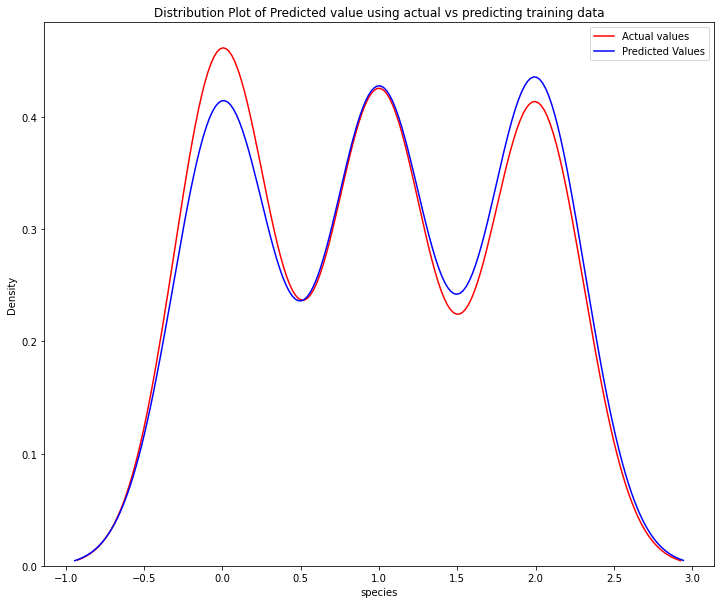

In [280]:
Title='Distribution Plot of Predicted value using actual vs predicting training data'
DistributionPlot(y_train,y_train_predict_tree,"Actual values","Predicted Values",Title)

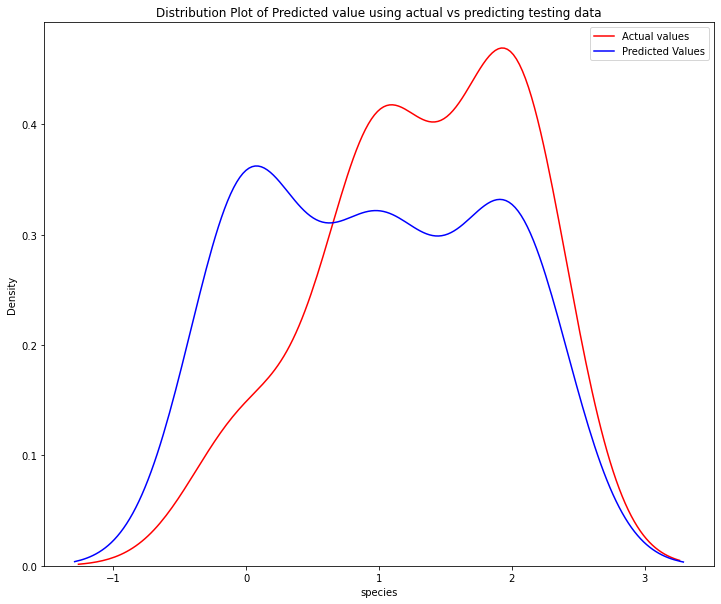

In [281]:
Title='Distribution Plot of Predicted value using actual vs predicting testing data'
DistributionPlot(y_test,y_test_predict_SVC,"Actual values","Predicted Values",Title)

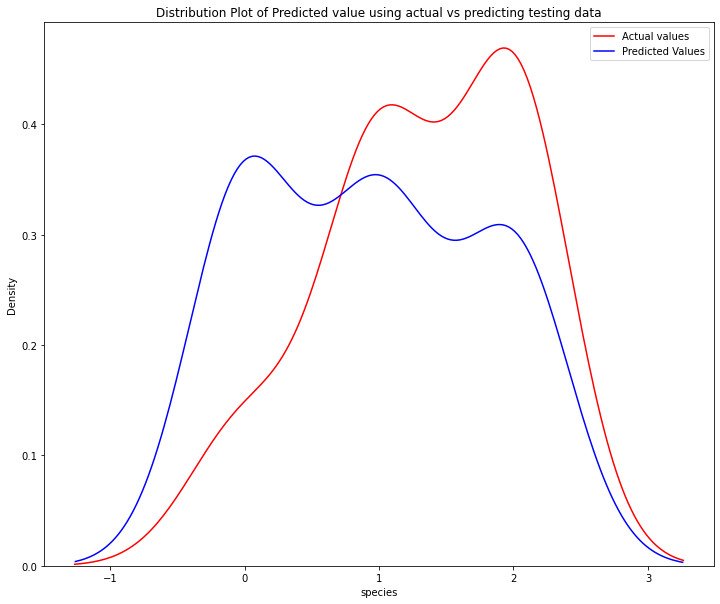

In [282]:
Title='Distribution Plot of Predicted value using actual vs predicting testing data'
DistributionPlot(y_test,y_test_predict_rfr_1,"Actual values","Predicted Values",Title)

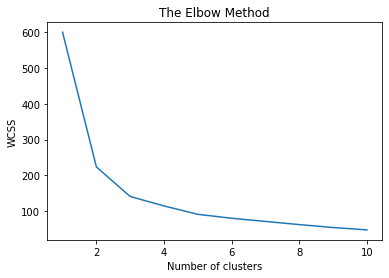

In [283]:
#using elbow ,ethod to find actual number of clusters
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++', max_iter=100, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

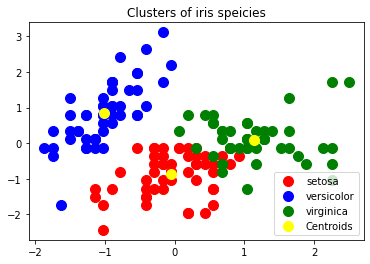

In [284]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=100,random_state=0) 
y_kmeans = kmeans.fit_predict(x)

# Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0,1],s=100,c='red',label='setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1,1],s=100,c='blue',label='versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],s=100,c='green',label='virginica')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='yellow',label='Centroids')
plt.title('Clusters of iris speicies')
plt.legend()
plt.show()

In [285]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# Create a K-means clustering model
model = KMeans(n_clusters=3)

# Fit the model to the data
model.fit(x)

# Predict the cluster labels for each data point
labels = model.predict(x)

# Calculate the silhouette score
silhouette_score = silhouette_score(x, labels)

print('The silhouette score is:', silhouette_score)

The silhouette score is: 0.45840087099074767
